# Summary of Quantum Operations 

In [1]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

## Single Qubit Quantum states

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note due to conservation probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only requires two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices. 

-------

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

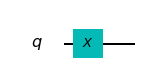

In [5]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

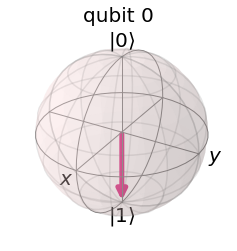

In [7]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [8]:
out

array([0.+0.j, 1.+0.j])

In [13]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

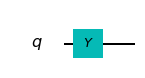

In [14]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')

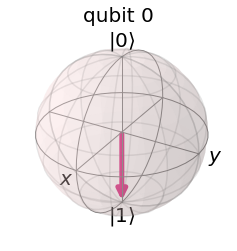

In [15]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [16]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]


#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

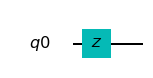

In [17]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw(output='mpl')

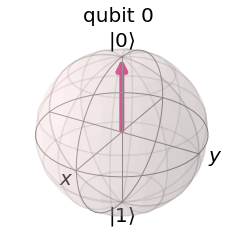

In [18]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [19]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


#### Experiment

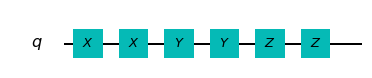

In [25]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.x(0)
qc.y(0)
qc.y(0)
qc.z(0)
qc.z(0)
qc.draw('mpl')

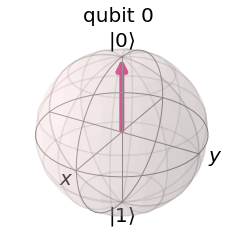

In [26]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [27]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


#### Experiment 2: 

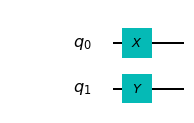

In [36]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(2)
qc.x(0)
qc.y(1)
qc.draw('mpl')

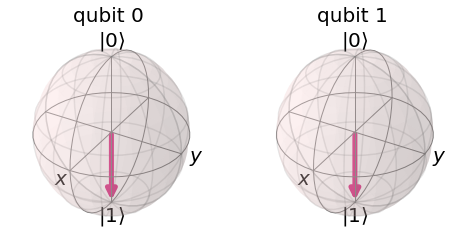

In [37]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [38]:
out

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j])

$Y \otimes X$

In [39]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]


---------------

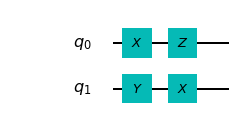

In [40]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(2)
qc.x(0)
qc.y(1)
qc.z(0)
qc.x(1)
qc.draw('mpl')

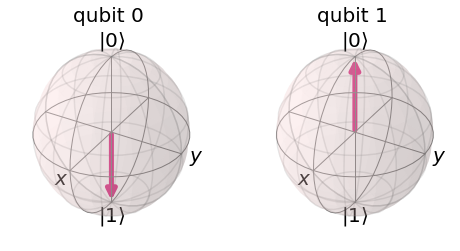

In [41]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

$ (X \otimes Z)  \times (Y \otimes X)$

In [42]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [-0.-1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.-1.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]]


---------------

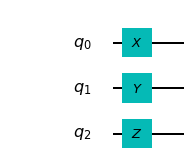

In [44]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)
qc.draw('mpl')

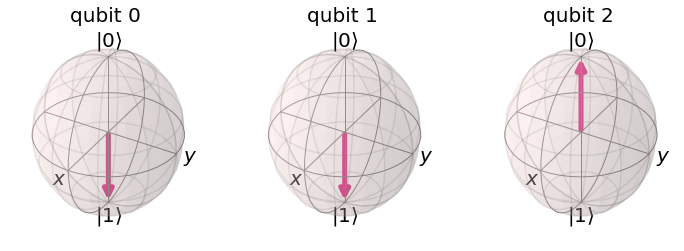

In [45]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [47]:
out

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

$Z \otimes Y \otimes Z$

In [46]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

# Show the results
print(result.get_unitary(qc, decimals=3))

[[ 0.+0.j  0.+0.j  0.+0.j  0.-1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.-1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+1.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-1.j  0.+0.j  0.+0.j  0.+0.j]]
